In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model,metrics,preprocessing,tree,neighbors,model_selection,datasets,svm,model_selection
np.random.seed(42)
import seaborn as sns


#Loading the dataset

In [ ]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


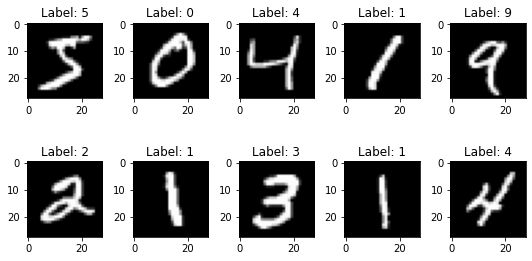

In [ ]:
#just drawing the images
num = 10
images = x_train[:num]
labels = y_train[:num]
num_row = 2
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
#printing the shappes
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
#reshape image 2 dim into i dim for each x train and x test
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


#Data normilization and one hat encoding

In [ ]:

#divide by 255
x_train=x_train/255
x_test=x_test/255


In [ ]:
#hat encoding
y_train_hot=tf.one_hot(y_train,depth=len(set(y_train)))
y_test_hot=tf.one_hot(y_test,depth=len(set(y_train)))
#print the shapes
print(f'y_train_hot.shape is {y_train_hot.shape}')
print(f'y_test_hot.shape is {y_test_hot.shape}')
print(f'x_test.shape is {x_test.shape}')
print(f'y_test.shape is {y_test.shape}')


y_train_hot.shape is (60000, 10)
y_test_hot.shape is (10000, 10)
x_test.shape is (10000, 784)
y_test.shape is (10000,)


In [ ]:
#validation and training splitting
x_validation=x_train[:5000]
y_validation=y_train_hot[:5000]
#the second 30000 goes for training
x_train=x_train[30000:]
y_train=y_train[30000:]
y_train_hot=y_train_hot[30000:]


(array([2962., 3319., 3010., 3058., 2916., 2712., 2943., 3158., 2976.,
        2946.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

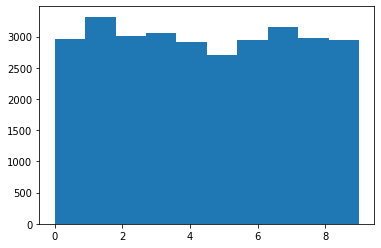

In [ ]:
plt.hist(y_train) #this train data have a good classes distribution ...

In [ ]:
#taking only 5000 for test data
y_test=y_test[:5000]
x_test=x_test[:5000]

In [ ]:
y_test_hot=y_test_hot[:5000]
y_test_hot.shape

TensorShape([5000, 10])

In [ ]:
print(f'x_train.shape is {x_train.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_train_hot.shape is {y_train_hot.shape}')
print(f'x_test.shape is {x_test.shape}')
print(f'y_test.shape is {y_test.shape}')
print(f'x_validation is {x_validation.shape}')
print(f'y_validation is {y_validation.shape}')

x_train.shape is (30000, 784)
y_train shape is (30000,)
y_train_hot.shape is (30000, 10)
x_test.shape is (5000, 784)
y_test.shape is (5000,)
x_validation is (5000, 784)
y_validation is (5000, 10)


#Models

##Logistic

In [ ]:
log_reg=linear_model.LogisticRegression(max_iter=1000,random_state=42)
log_model=log_reg.fit(x_train,y_train)

In [ ]:
log_pred=log_model.predict(x_test)
print(metrics.accuracy_score(y_test,log_pred))
print(y_test[:10])
print(log_pred[:10])

0.8932
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 6 9]


In [ ]:
log_confusion_matrix=metrics.confusion_matrix(y_test,log_pred)
log_confusion_matrix.view()

array([[448,   0,   4,   0,   0,   3,   2,   2,   1,   0],
       [  0, 561,   2,   2,   0,   1,   3,   1,   1,   0],
       [  4,   6, 461,  14,   5,   2,   9,   7,  20,   2],
       [  0,   1,  11, 447,   0,  18,   3,  10,   5,   5],
       [  1,   2,   7,   1, 447,   2,   7,   4,   2,  27],
       [  7,   1,   4,  26,   7, 370,   6,   7,  21,   7],
       [  9,   4,   4,   1,   5,  10, 423,   2,   4,   0],
       [  2,  10,  14,   5,   5,   1,   0, 449,   4,  22],
       [  7,   6,   5,  23,   9,  16,   4,   5, 406,   8],
       [  5,   7,   1,   6,  21,   4,   1,  15,   6, 454]])

In [ ]:
arr=np.array(log_confusion_matrix)
# (arr[arr>300].mean())
# (arr[arr>300].sum())/arr.sum()
arr[arr>300]

array([448, 561, 461, 447, 447, 370, 423, 449, 406, 454])

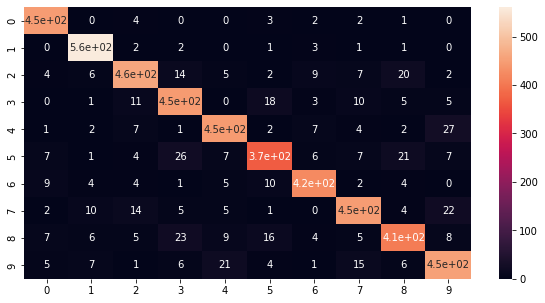

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(log_confusion_matrix,annot=True)

##Knn

In [ ]:
knn_list=[]

In [ ]:
#knn
nei=neighbors.KNeighborsClassifier(n_neighbors=5,leaf_size=50,weights ='distance')
knn_model=nei.fit(x_train,y_train_hot)
knn_pred=knn_model.predict(x_test)

In [ ]:
y_test_hot.shape
print(metrics.accuracy_score(y_test_hot,knn_pred))
knn_list.append(metrics.accuracy_score(y_test_hot,knn_pred))
knn_list

0.9422


[0.9422]

In [ ]:
knn_confusion_matrix=metrics.confusion_matrix(y_test,np.argmax(knn_pred,-1))
knn_confusion_matrix.view()

array([[456,   0,   1,   0,   0,   1,   2,   0,   0,   0],
       [  1, 568,   2,   0,   0,   0,   0,   0,   0,   0],
       [ 16,   6, 489,   2,   1,   0,   3,  12,   1,   0],
       [  4,   1,   2, 474,   1,   9,   0,   6,   2,   1],
       [  4,   4,   0,   0, 458,   0,   6,   2,   1,  25],
       [ 12,   0,   0,   2,   1, 434,   2,   2,   0,   3],
       [  6,   5,   0,   0,   2,   1, 447,   0,   1,   0],
       [  6,  22,   1,   0,   1,   0,   0, 477,   0,   5],
       [ 29,   3,   1,  11,   1,   6,   3,   4, 428,   3],
       [ 13,   5,   2,   4,   6,   1,   1,   7,   0, 481]])

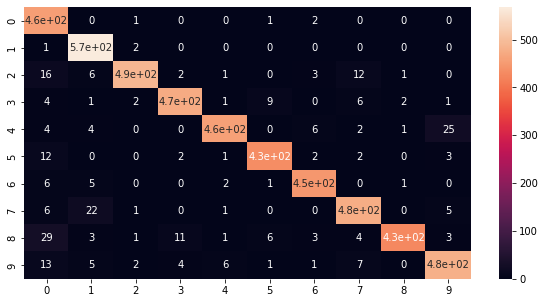

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(knn_confusion_matrix,annot=True)

##Svm

In [ ]:
svm_list=[]

In [ ]:
#svm
svc=svm.SVC(C=7,gamma=0.02,random_state=42)
svc_model=svc.fit(x_train,y_train)
svc_pred=svc_model.predict(x_test)

In [ ]:
print(metrics.accuracy_score(y_test,svc_pred))
print(metrics.precision_score(y_test,svc_pred,average="weighted"))
print(metrics.recall_score(y_test,svc_pred,average="weighted"))
svm_list.append(metrics.accuracy_score(y_test,svc_pred))
svm_list

0.9728
0.9728162307044343
0.9728


[0.9728]

In [ ]:
svm_confusion_matrix=metrics.confusion_matrix(y_test,svc_pred)
svm_confusion_matrix.view()

array([[457,   0,   1,   0,   0,   1,   0,   0,   1,   0],
       [  0, 567,   2,   1,   0,   0,   0,   0,   0,   1],
       [  1,   2, 514,   4,   1,   0,   1,   5,   2,   0],
       [  0,   0,   3, 489,   0,   4,   0,   2,   1,   1],
       [  0,   0,   3,   0, 487,   0,   2,   1,   0,   7],
       [  1,   0,   0,   5,   0, 445,   1,   0,   3,   1],
       [  4,   2,   1,   0,   2,   2, 450,   0,   1,   0],
       [  1,   3,   6,   0,   1,   0,   0, 493,   1,   7],
       [  4,   0,   1,   5,   0,   2,   1,   3, 470,   3],
       [  2,   6,   1,   4,   7,   2,   1,   2,   3, 492]])

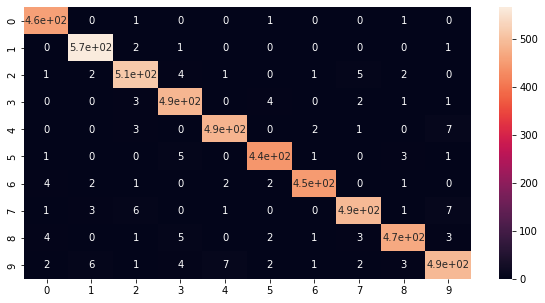

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(svm_confusion_matrix,annot=True)

##Tree decision

In [ ]:
tree_list=[]

In [ ]:
#decision tree
tree_class=tree.DecisionTreeClassifier(random_state=42)
tree_model=tree_class.fit(x_train,y_train_hot)
tree_pred=tree_model.predict(x_test)


In [ ]:
tree_pred.shape
print(metrics.accuracy_score(y_test_hot,tree_pred))
print(f'precision_score is {metrics.precision_score(y_test_hot,tree_pred,average="weighted")}')
print(f'recall_score is {metrics.recall_score(y_test_hot,tree_pred,average="weighted")}')
tree_acc=metrics.accuracy_score(y_test_hot,tree_pred)
tree_list.append(metrics.accuracy_score(y_test_hot,tree_pred))
tree_list

0.8256
precision_score is 0.8247757245049088
recall_score is 0.8256


[0.8256, 0.8256]

In [ ]:
tree_confusion_matrix=metrics.confusion_matrix(y_test,np.argmax(tree_pred,-1))
tree_confusion_matrix.view()

array([[417,   0,   6,   4,   5,  11,   7,   5,   3,   2],
       [  0, 549,   6,   2,   7,   1,   1,   0,   1,   4],
       [  7,  11, 434,  13,   7,   6,  17,  15,  16,   4],
       [  5,   5,  13, 398,   5,  37,   4,  13,  13,   7],
       [  1,   5,   9,   6, 430,   5,   9,   6,   6,  23],
       [ 13,   5,   6,  36,   4, 341,  19,   8,  12,  12],
       [  6,   6,   6,   7,  12,  22, 380,   3,  16,   4],
       [  4,   8,  21,  12,   8,   3,   1, 431,   9,  15],
       [  4,   6,  24,  33,  20,  17,  16,   8, 336,  25],
       [  5,   5,   5,  11,  30,   9,   4,  19,  20, 412]])

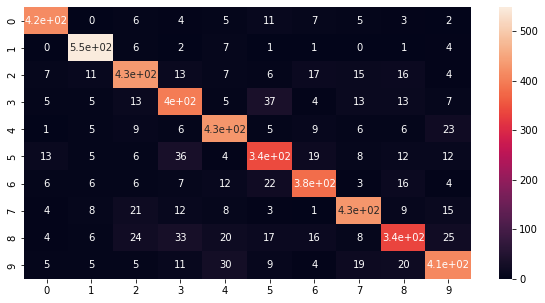

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(tree_confusion_matrix,annot=True)

##Dnn

In [ ]:
dnn_list=[]

In [ ]:
#DNN
tf_model=tf.keras.models.Sequential([
                                     tf.keras.layers.Input(shape=(784)),
                                     tf.keras.layers.Dense(units=256,activation=tf.nn.leaky_relu,kernel_initializer=tf.keras.initializers.he_uniform),
                                     tf.keras.layers.Dropout(0.38),
                                     tf.keras.layers.Dense(units=256,activation=tf.nn.leaky_relu,kernel_initializer=tf.keras.initializers.he_uniform),
                                     tf.keras.layers.Dropout(0.38),
                                     tf.keras.layers.Dense(units=128,activation=tf.nn.leaky_relu,kernel_initializer=tf.keras.initializers.he_uniform),
                                    #  tf.keras.layers.Dropout(0.2),
                                    #  tf.keras.layers.Dense(units=256,activation=tf.nn.leaky_relu,kernel_initializer=tf.keras.initializers.he_uniform),
                                    #  tf.keras.layers.Dropout(0.1),
                                    #  tf.keras.layers.Dense(units=32,activation=tf.nn.leaky_relu,kernel_initializer=tf.keras.initializers.he_uniform),
                                     tf.keras.layers.Dense(units=10,activation=tf.nn.softmax,name="output"),
])

In [ ]:
tf_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 300,938
Trainable params: 300,938
Non-trainable params: 0
________________________________________________

In [ ]:
tf_model.compile(optimizer=tf.optimizers.Adam(),loss=tf.keras.losses.CategoricalCrossentropy(),metrics="acc")

In [ ]:
history=tf_model.fit(x=x_train,y=y_train_hot,batch_size=32,epochs=18,validation_data=(x_validation,y_validation))

Epoch 1/18
938/938 [==============================] - 5s 5ms/step - loss: 0.4141 - acc: 0.8702 - val_loss: 0.1898 - val_acc: 0.9414
Epoch 2/18
938/938 [==============================] - 5s 5ms/step - loss: 0.2406 - acc: 0.9265 - val_loss: 0.1479 - val_acc: 0.9548
Epoch 3/18
938/938 [==============================] - 5s 5ms/step - loss: 0.1937 - acc: 0.9407 - val_loss: 0.1492 - val_acc: 0.9522
Epoch 4/18
938/938 [==============================] - 5s 5ms/step - loss: 0.1749 - acc: 0.9465 - val_loss: 0.1241 - val_acc: 0.9634
Epoch 5/18
938/938 [==============================] - 5s 5ms/step - loss: 0.1628 - acc: 0.9500 - val_loss: 0.1093 - val_acc: 0.9668
Epoch 6/18
938/938 [==============================] - 5s 5ms/step - loss: 0.1430 - acc: 0.9549 - val_loss: 0.1391 - val_acc: 0.9630
Epoch 7/18
938/938 [==============================] - 5s 5ms/step - loss: 0.1361 - acc: 0.9570 - val_loss: 0.1269 - val_acc: 0.9622
Epoch 8/18
938/938 [==============================] - 5s 5ms/step - loss: 0.

#Plot Dnn model Results

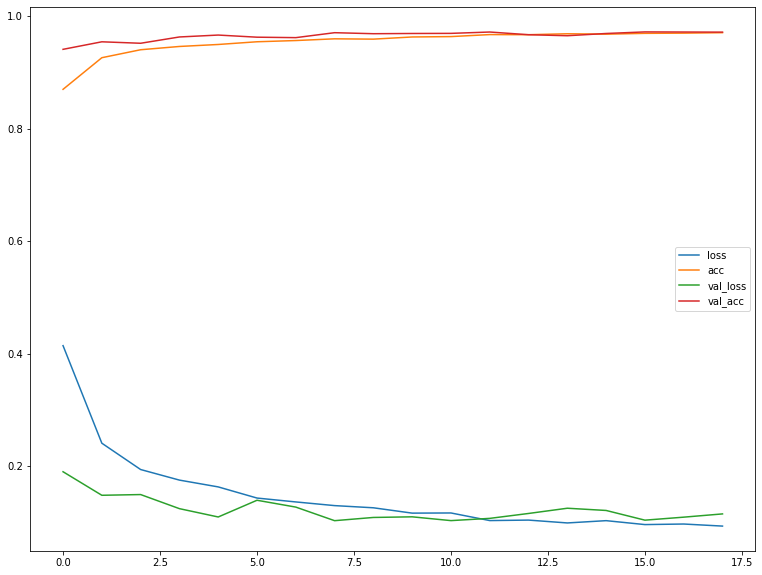

In [ ]:
hist_df=pd.DataFrame(history.history)
hist_df.plot(figsize=(13,10))

In [ ]:
dnn_pred=tf_model.predict(x_test)
acc=tf.reduce_mean(tf.metrics.categorical_accuracy(y_test_hot,dnn_pred))
print('acc:',acc)
loss=tf.reduce_mean(tf.metrics.categorical_crossentropy(y_test_hot,dnn_pred))
print('loss:',loss)
pr=metrics.precision_score(y_test,np.argmax(dnn_pred,-1),average='weighted')
print('pr:',pr)
re=metrics.recall_score(y_test,np.argmax(dnn_pred,-1),average='weighted')
print('re:',re)
confusion_matrix=metrics.confusion_matrix(y_test,np.argmax(dnn_pred,-1))
dnn_list.append([acc,loss,pr,re])
dnn_list

acc: tf.Tensor(0.9618, shape=(), dtype=float32)
loss: tf.Tensor(0.15027648, shape=(), dtype=float32)
pr: 0.9620861283922579
re: 0.9618


[[<tf.Tensor: shape=(), dtype=float32, numpy=0.9598>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.1629219>,
  0.9601409499055719,
  0.9598],
 [<tf.Tensor: shape=(), dtype=float32, numpy=0.9648>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.14978674>,
  0.9651140284920204,
  0.9648],
 [<tf.Tensor: shape=(), dtype=float32, numpy=0.9594>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.14721155>,
  0.9595890834089551,
  0.9594],
 [<tf.Tensor: shape=(), dtype=float32, numpy=0.9596>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.1530394>,
  0.9598933774383269,
  0.9596],
 [<tf.Tensor: shape=(), dtype=float32, numpy=0.9618>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.15027648>,
  0.9620861283922579,
  0.9618]]

In [ ]:
dnn_confusion_matrix=metrics.confusion_matrix(y_test,np.argmax(dnn_pred,-1))
dnn_confusion_matrix.view()

array([[456,   0,   1,   0,   0,   1,   1,   0,   1,   0],
       [  0, 566,   3,   1,   0,   0,   0,   0,   1,   0],
       [  1,   1, 507,   6,   2,   0,   0,   9,   4,   0],
       [  0,   0,   2, 488,   0,   4,   0,   5,   0,   1],
       [  1,   0,   5,   0, 480,   0,   2,   2,   1,   9],
       [  1,   0,   0,  13,   2, 429,   1,   2,   5,   3],
       [  7,   3,   1,   0,   4,  14, 429,   0,   4,   0],
       [  1,   4,   4,   4,   1,   0,   0, 495,   2,   1],
       [  3,   1,   2,   5,   3,   0,   0,   3, 471,   1],
       [  1,   6,   0,   5,   7,   1,   1,   5,   6, 488]])

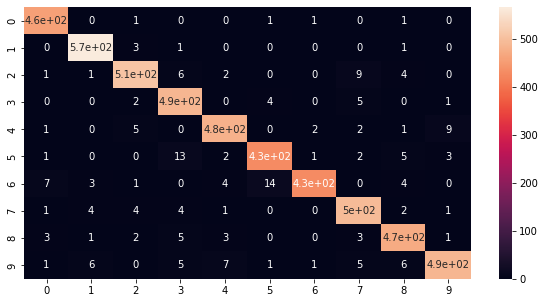

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(dnn_confusion_matrix,annot=True)

#Models Comparison (Best Three)

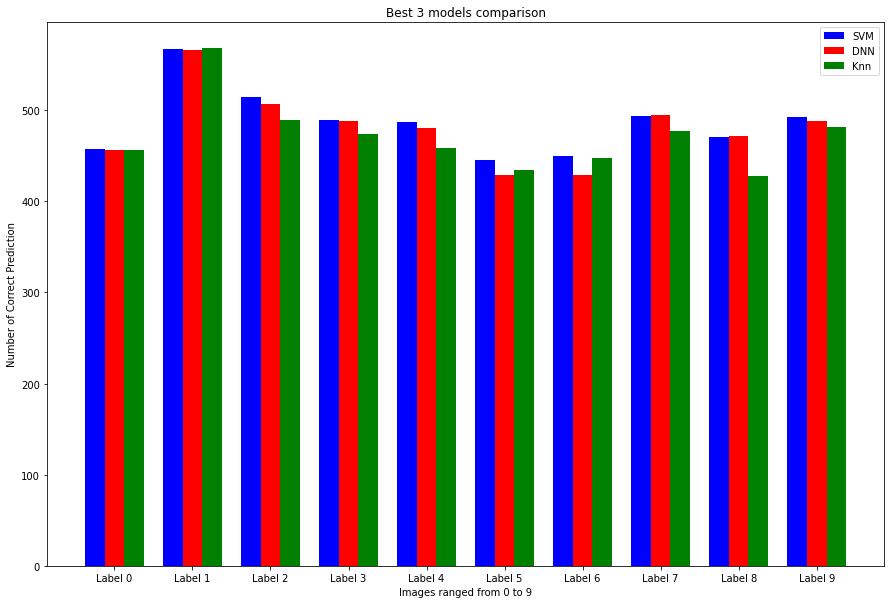

In [ ]:
plt.figure(figsize=(15,10))
bar_width=0.25
labelss=['Label 0','Label 1','Label 2','Label 3',
         'Label 4','Label 5','Label 6','Label 7',
         'Label 8','Label 9']
indexes=np.arange(0,10,1)
svm_arry=np.array(svm_confusion_matrix.view())
Knn_arry=np.array(knn_confusion_matrix.view())
Dnn_arry=np.array(dnn_confusion_matrix.view())
Tree_arry=np.array(tree_confusion_matrix.view())
Log_arry=np.array(log_confusion_matrix.view())
plt.bar(indexes-bar_width,svm_arry[svm_arry>300],width=bar_width,color="b",label="SVM")
plt.bar(indexes,Dnn_arry[Dnn_arry>300],width=bar_width,color="r",label="DNN")
plt.bar(indexes+bar_width,Knn_arry[Knn_arry>300],width=bar_width,color="g",label="Knn")
# plt.bar(indexes+(bar_width),Tree_arry[Tree_arry>300],width=bar_width,color="c",label="TR_D")
# plt.bar(indexes+(bar_width*2),Log_arry[Log_arry>300],width=bar_width,color="y",label="Log")
plt.xticks(np.arange(len(labelss)),labels=labelss)
plt.xlabel('Images ranged from 0 to 9')
plt.title('Best 3 models comparison')
plt.ylabel('Number of Correct Prediction')
plt.legend()

#Best model

In [ ]:
print("""
          The best model so far is the SVM model and this
                 can be seen by its tesing data score and its confision matrix followed by 
                             Dnn and Knn which placed second and third respectively among the remaining models                                                   
                                                                                                              """)


          The best model so far is the SVM model and this
                 can be seen by its tesing data score and its confision matrix followed by 
                             Dnn and Knn which placed second and third respectively among the remaining models                                                   
                                                                                                              
